In [10]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

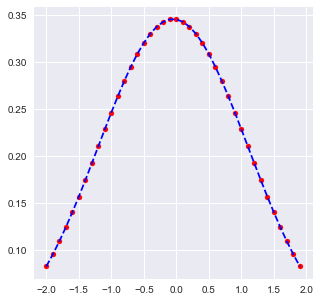

In [11]:
#normal distribution  #How to draw
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 *np.pi)) *np.exp( -(x -mean)**2 / (2 * std **2))
    return y_out

# to generate an array of x
x = np.arange(-2, 2, 0.1)
y = pdf(x)

#plotting the normal curve / or gaussian ditribution

plt.style.use('seaborn')
plt.figure(figsize=(5,5))

plt.plot(x, y, color = 'blue', linestyle = 'dashed')

plt.scatter(x, y, marker = 'o', s=25, color='red')

In [30]:
# import  a dataset

flower= sns.load_dataset('iris')
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

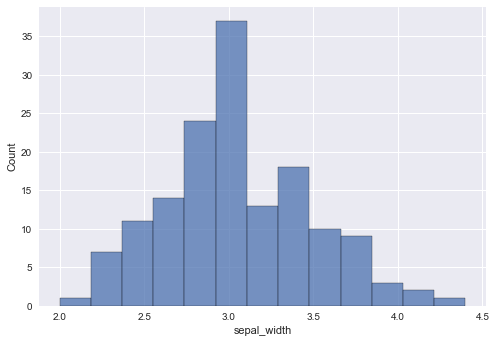

In [33]:
# Histogram test
sns.histplot(flower['sepal_width'])

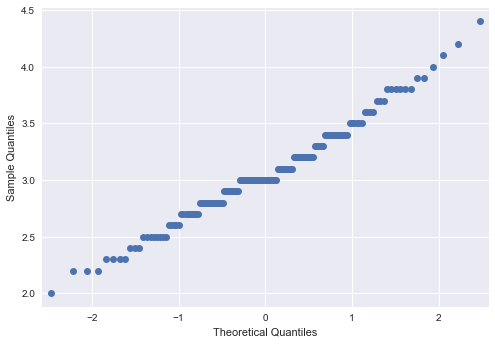

In [37]:
# qqplot
from statsmodels.graphics.gofplots import qqplot

#  q-q norm plot
qqplot(flower['sepal_width'])
plt.show()

In [41]:
# shapirowilk test
# import library

from scipy.stats import shapiro

stat, p = shapiro(flower['sepal_width'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional arguement for further for use
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else: 
    print('Probably not Gaussian nor normal Distribution')

stat=0.985, p=0.101
Probably Gaussian or Normal Distribution


In [42]:
# D' Agostino's K^2 test #ye kb lagna he #assignment
# import library

from scipy.stats import normaltest

stat, p = normaltest(flower['sepal_width'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional arguement for further for use
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else: 
    print('Probably not Gaussian nor normal Distribution')

stat=3.124, p=0.210
Probably Gaussian or Normal Distribution


In [43]:
from scipy.stats import anderson

#select a column to check the normal distribtion
result = anderson(flower['sepal_width'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Guassian/Normal Distribution at the %.1f level' % (sl))
    else:
        print('Probably not Guassian/Normal Distribution at the %.1f %% level' % (sl))

stat=0.908
Probably not Guassian/Normal Distribution at the 15.0 % level
Probably not Guassian/Normal Distribution at the 10.0 % level
Probably not Guassian/Normal Distribution at the 5.0 % level
Probably not Guassian/Normal Distribution at the 2.5 % level
Probably Guassian/Normal Distribution at the 1.0 level
